In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 22})

import seaborn as sns
from sklearn import metrics, preprocessing
import pandas_profiling
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, recall_score, precision_score,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix, average_precision_score,recall_score
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
%matplotlib inline
Image(url= "Capture.JPG")

In [79]:
Image(url= "Capture1.JPG")

In [3]:
pwd()

'C:\\Users\\Somesh\\Jupyter_Python\\RP_Practicals'

In [4]:
#print multiple statements in same line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity ="all"

In [5]:
titanicData = pd.read_excel('titanic.xls', index_col=None, na_values=['NA'])

In [6]:
titanicData.sample(10)
titanicData.info()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
434,2,1,"Hart, Miss. Eva Miriam",female,7.0,0,2,F.C.C. 13529,26.2500,NaN,S,14,NaN,"Ilford, Essex / Winnipeg, MB"
807,3,0,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,W./C. 6608,34.3750,NaN,S,NaN,NaN,"Rotherfield, Sussex, England Essex Co, MA"
409,2,0,"Fox, Mr. Stanley Hubert",male,36.0,0,0,229236,13.0000,NaN,S,NaN,236.0,"Rochester, NY"
570,2,1,"Toomey, Miss. Ellen",female,50.0,0,0,F.C.C. 13531,10.5000,NaN,S,9,NaN,"Indianapolis, IN"
1016,3,0,"Mernagh, Mr. Robert",male,NaN,0,0,368703,7.7500,NaN,Q,NaN,NaN,NaN
1056,3,1,"Nicola-Yarred, Master. Elias",male,12.0,1,0,2651,11.2417,NaN,C,C,NaN,NaN
457,2,0,"Hunt, Mr. George Henry",male,33.0,0,0,SCO/W 1585,12.2750,NaN,S,NaN,NaN,"Philadelphia, PA"
679,3,0,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,NaN,C,NaN,NaN,"Syria Kent, ON"
1076,3,0,"O'Donoghue, Ms. Bridget",female,NaN,0,0,364856,7.7500,NaN,Q,NaN,NaN,NaN
1087,3,0,"Olsson, Mr. Nils Johan Goransson",male,28.0,0,0,347464,7.8542,NaN,S,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


# Exploratory Data Analysis

In [7]:
pandas_profiling.ProfileReport(titanicData)

Number of variables,14
Number of observations,1309
Total Missing (%),21.0%
Total size in memory,143.2 KiB
Average record size in memory,112.1 B
Numeric,6
Categorical,7
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [8]:
titanicData.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


# Data Visualization

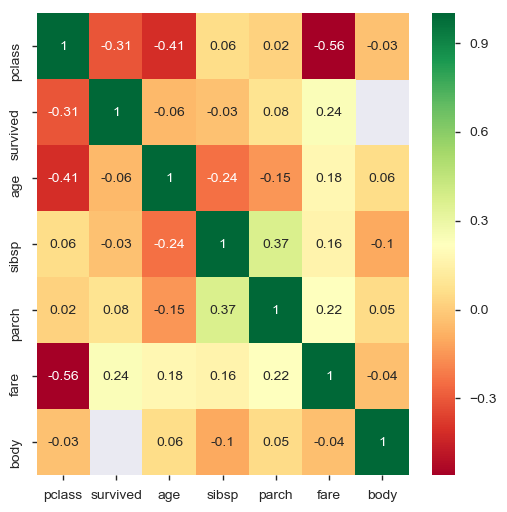

In [9]:
# compute the pair wise correlation for all columns  
correlation_matrix = titanicData.corr().round(2)
plt.subplots(figsize=(6,6))
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, cmap='RdYlGn',annot=True)
plt.show();

In [10]:
#List of columns of titanicData
titanicData.columns
titanicData.shape

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

(1309, 14)

In [11]:
#let’s examine the overall chance of survival for a Titanic passenger.
titanicData['survived'].mean()

0.3819709702062643

The calculation shows that only 38% of the passengers survived. Not the best odds. The reason for this massive loss of life is that the Titanic was only carrying 20 lifeboats, which was not nearly enough for the 1,309 passengers and 885 crew members aboard. It seems unlikely that all of the passengers would have had equal chances at survival, so we will continue breaking down the data to examine the social dynamics that determined who got a place on a lifeboat and who did not.

In [12]:
#To get a view into the composition of each class, we can group data by class, and view the averages for each column:
titanicData.groupby('pclass').mean()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


For instance, passengers in first class had a 62% chance of survival, compared to a 25.5% chance for those in 3rd class. Additionally, the lower classes generally consisted of younger people, and the ticket prices for first class were predictably much higher than those for second and third class.

In [13]:
#Now lets see by grouping function for both class and sex:
class_sex_grouping = titanicData.groupby(['pclass','sex']).mean()
class_sex_grouping

survived        age     sibsp     parch        fare        body
pclass sex                                                                    
1      female  0.965278  37.037594  0.555556  0.472222  109.412385         NaN
       male    0.340782  41.029250  0.340782  0.279330   69.888385  162.828571
2      female  0.886792  27.499191  0.500000  0.650943   23.234827   52.000000
       male    0.146199  30.815401  0.327485  0.192982   19.904946  171.233333
3      female  0.490741  22.185307  0.791667  0.731481   15.324250  183.000000
       male    0.152130  25.962273  0.470588  0.255578   12.415462  151.854167

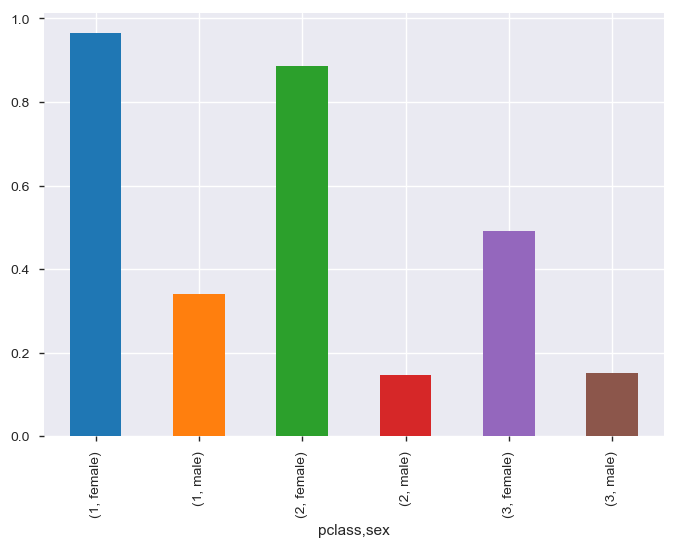

In [14]:
class_sex_grouping['survived'].plot.bar()

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Sex')

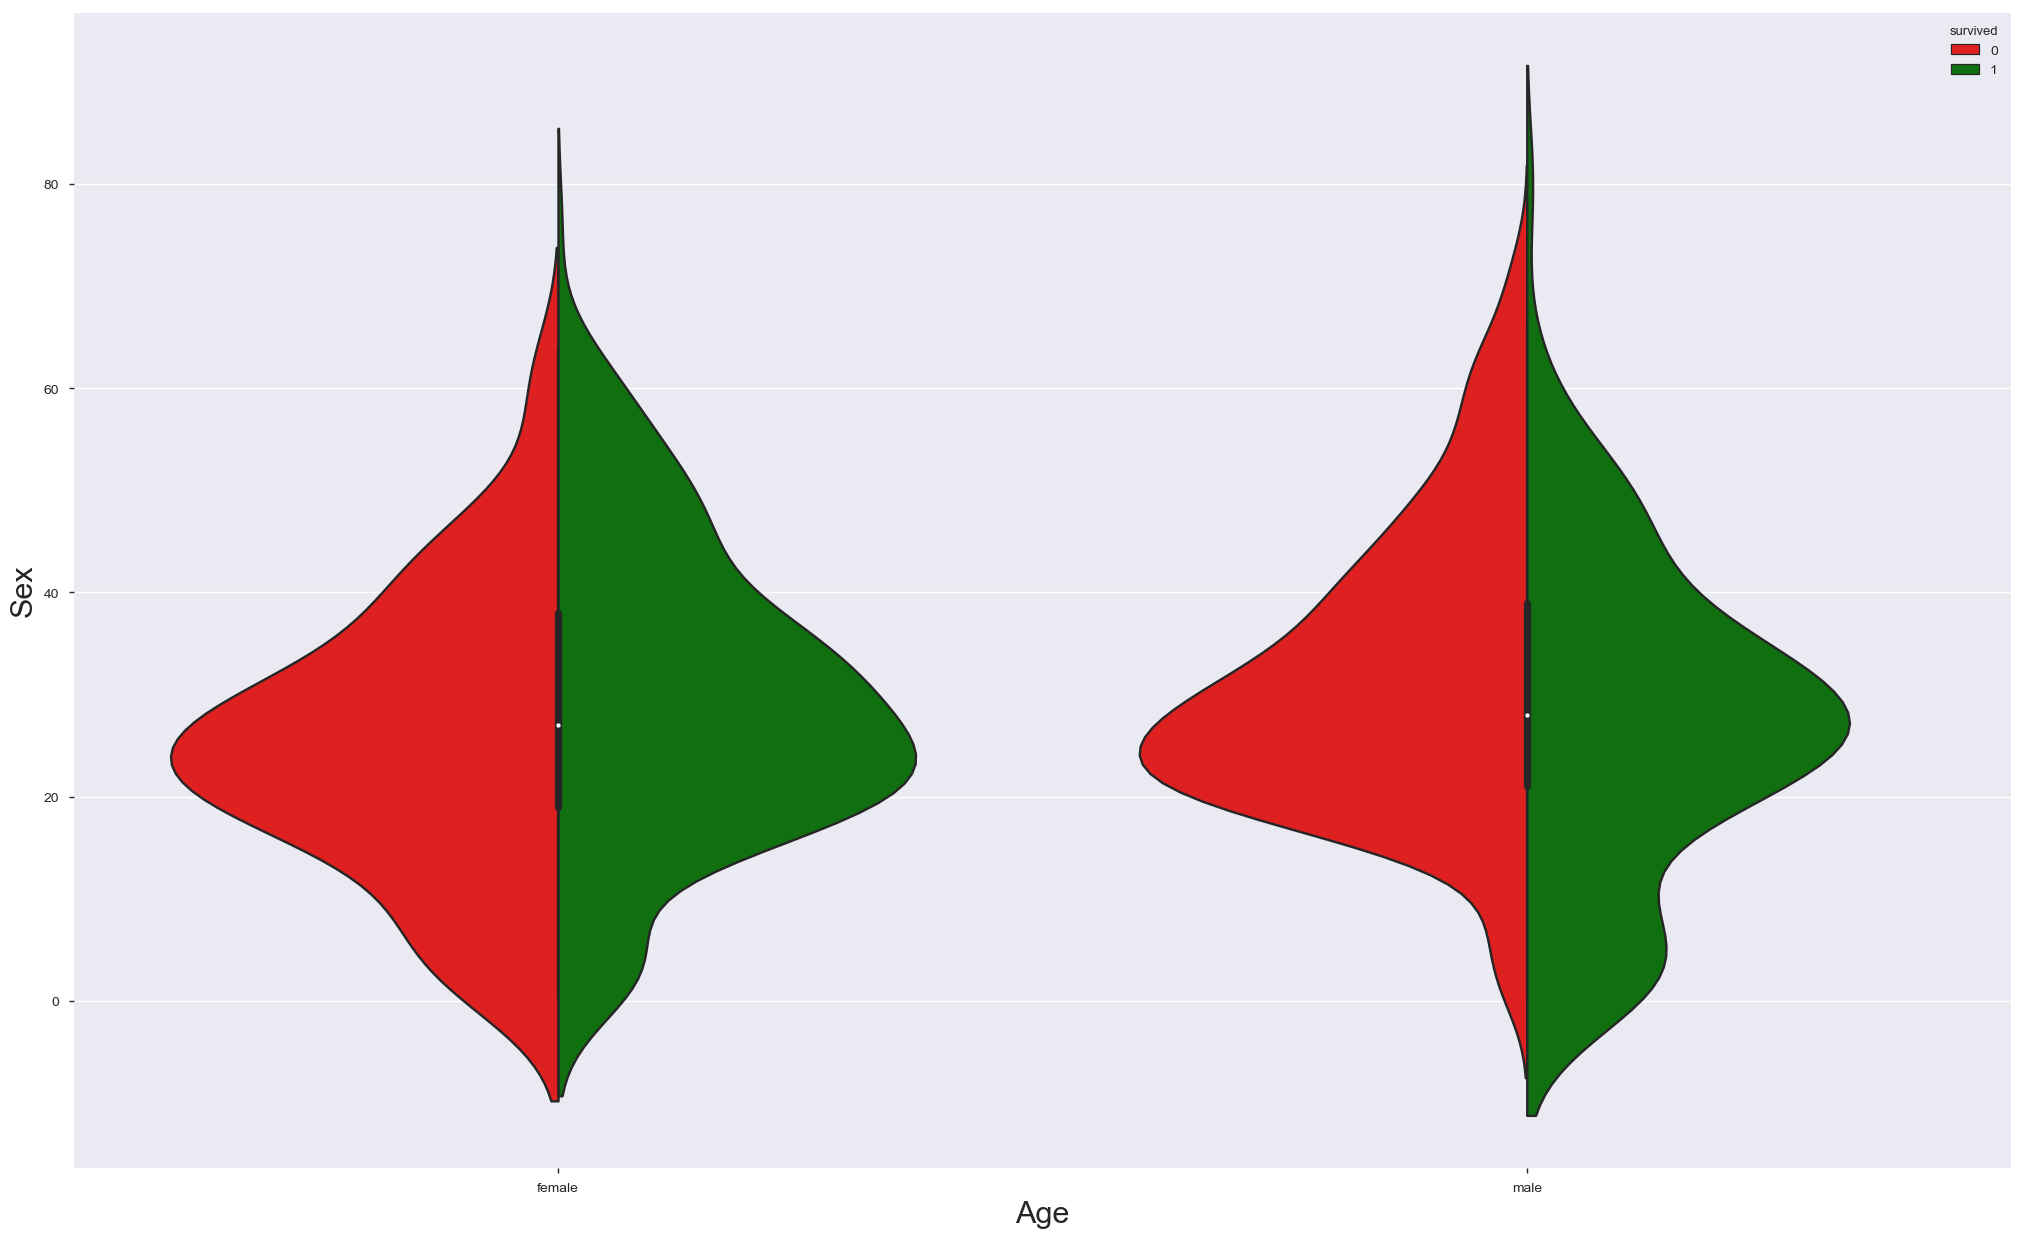

In [15]:
fig = plt.figure(figsize=(25, 15))
sns.violinplot(x='sex', y='age', 
               hue='survived', data=titanicData, 
               split=True,
               palette={0: "r", 1: "g"}
              );
plt.xlabel('Age',{'fontname':'Arial', 'size':'22'})
plt.ylabel('Sex',{'fontname':'Arial', 'size':'22'})
plt.show()

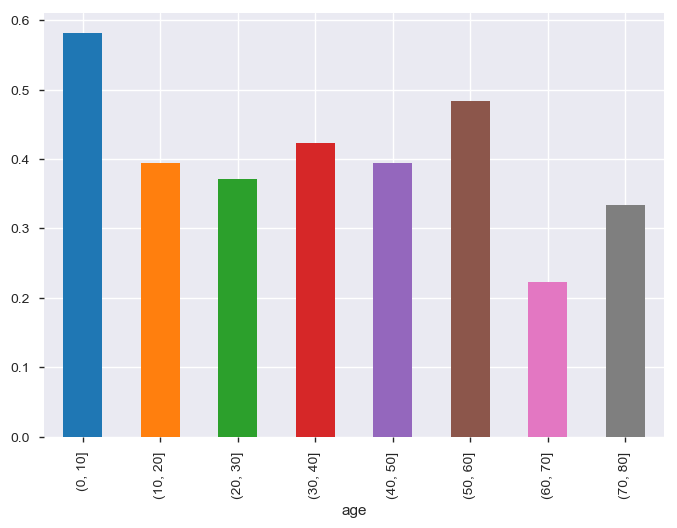

In [16]:
#Plot graph for survived passengers by grouping them with age
group_by_age = pd.cut(titanicData["age"], np.arange(0, 90, 10))
age_grouping = titanicData.groupby(group_by_age).mean()
age_grouping['survived'].plot.bar()

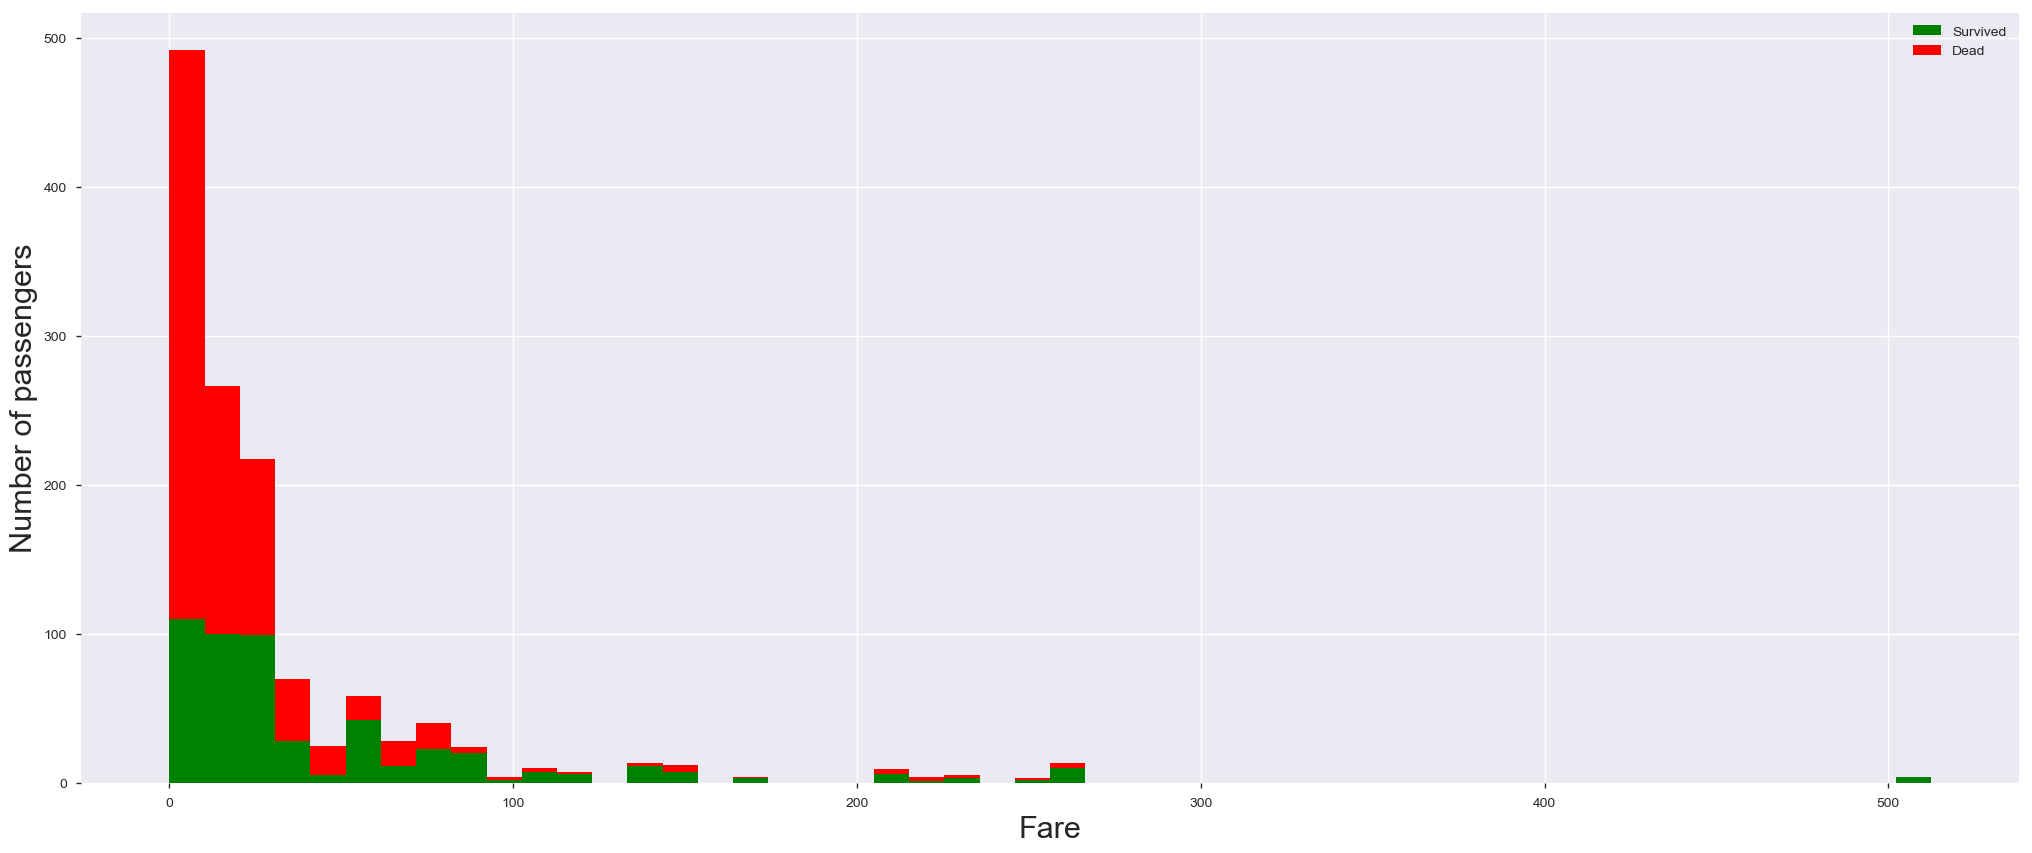

In [17]:
#now focus on the Fare ticket of each passenger and see how it could impact the survival.
figure = plt.figure(figsize=(25, 10))
plt.hist([titanicData[titanicData['survived'] == 1]['fare'], titanicData[titanicData['survived'] == 0]['fare']], 
         stacked=True, color = ['g','r'],
         bins = 50, label = ['Survived','Dead'])
plt.xlabel('Fare',{'fontname':'Arial', 'size':'22'})
plt.ylabel('Number of passengers',{'fontname':'Arial', 'size':'22'})
plt.legend();

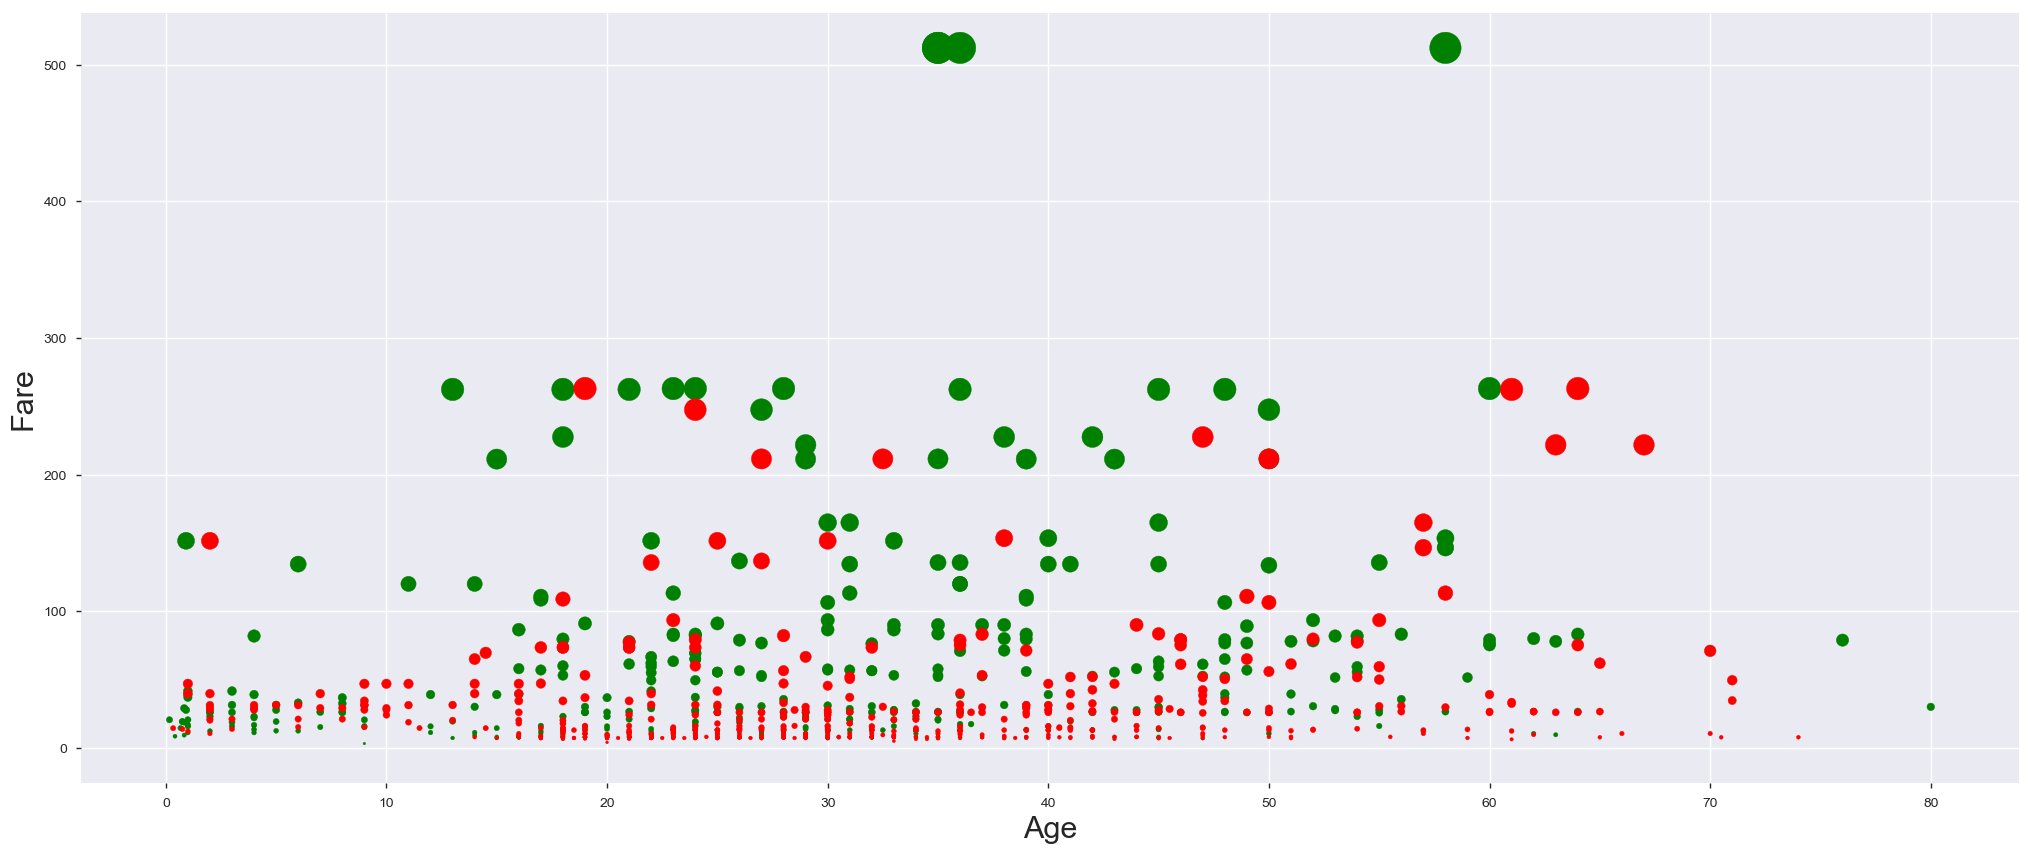

In [18]:
#now combine the age, the fare and the survival on a single chart.
plt.figure(figsize=(25, 10))
ax = plt.subplot()
plt.xlabel('Age',{'fontname':'Arial', 'size':'22'})
plt.ylabel('Fare',{'fontname':'Arial', 'size':'22'})
ax.scatter(titanicData[titanicData['survived'] == 1]['age'], titanicData[titanicData['survived'] == 1]['fare'], 
           c='green', s=titanicData[titanicData['survived'] == 1]['fare'])
ax.scatter(titanicData[titanicData['survived'] == 0]['age'], titanicData[titanicData['survived'] == 0]['fare'], 
           c='red', s=titanicData[titanicData['survived'] == 0]['fare']);

The size of the circles is proportional to the ticket fare.
- the x-axis, we have the ages 
- the y-axis, we consider the ticket fare.

We can observe different clusters:
- Large green dots between x=20 and x=45: adults with the largest ticket fares
- Small red dots between x=10 and x=45, adults from lower classes on the boat
- Small greed dots between x=0 and x=7: these are the children that were saved

Text(0.5, 0, 'Average fare')

Text(0, 0.5, 'PClass')

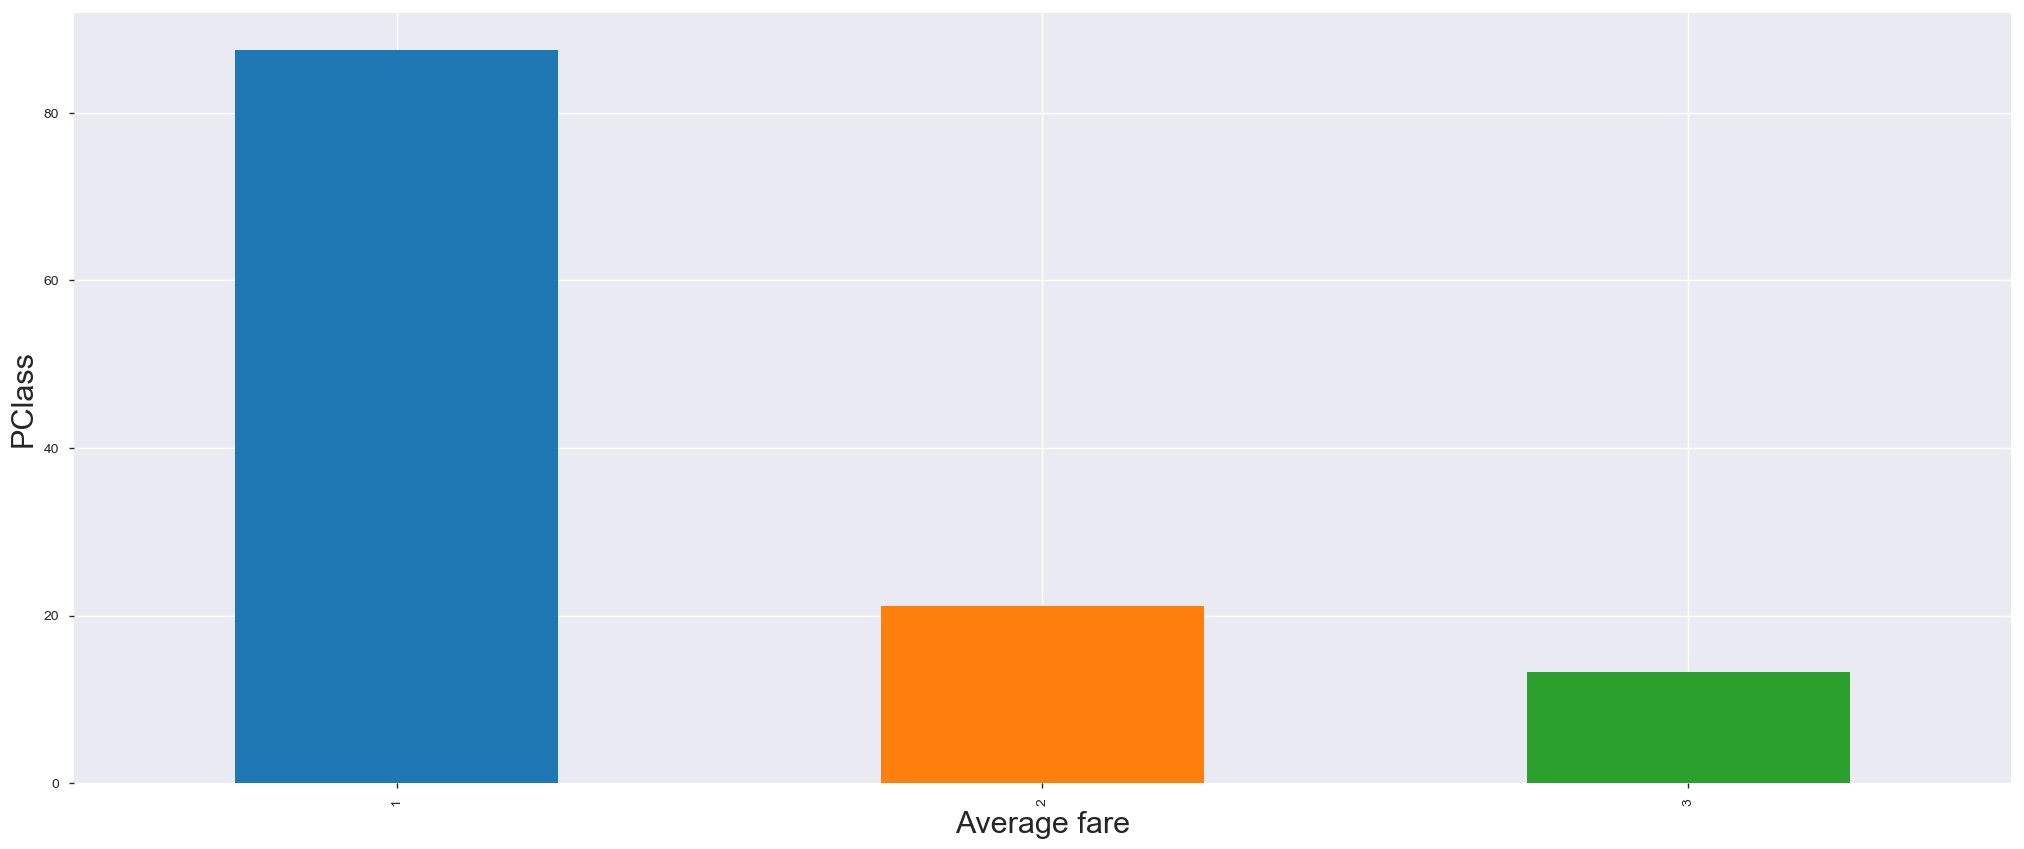

In [19]:
#the ticket fare correlates with the class 
ax = plt.subplot()
titanicData.groupby('pclass').mean()['fare'].plot(kind='bar', figsize=(25, 10), ax = ax)
plt.xlabel('Average fare',{'fontname':'Arial', 'size':'22'})
plt.ylabel('PClass',{'fontname':'Arial', 'size':'22'})
plt.show()

Text(0.5, 0, 'Fare')

Text(0, 0.5, 'embarked')

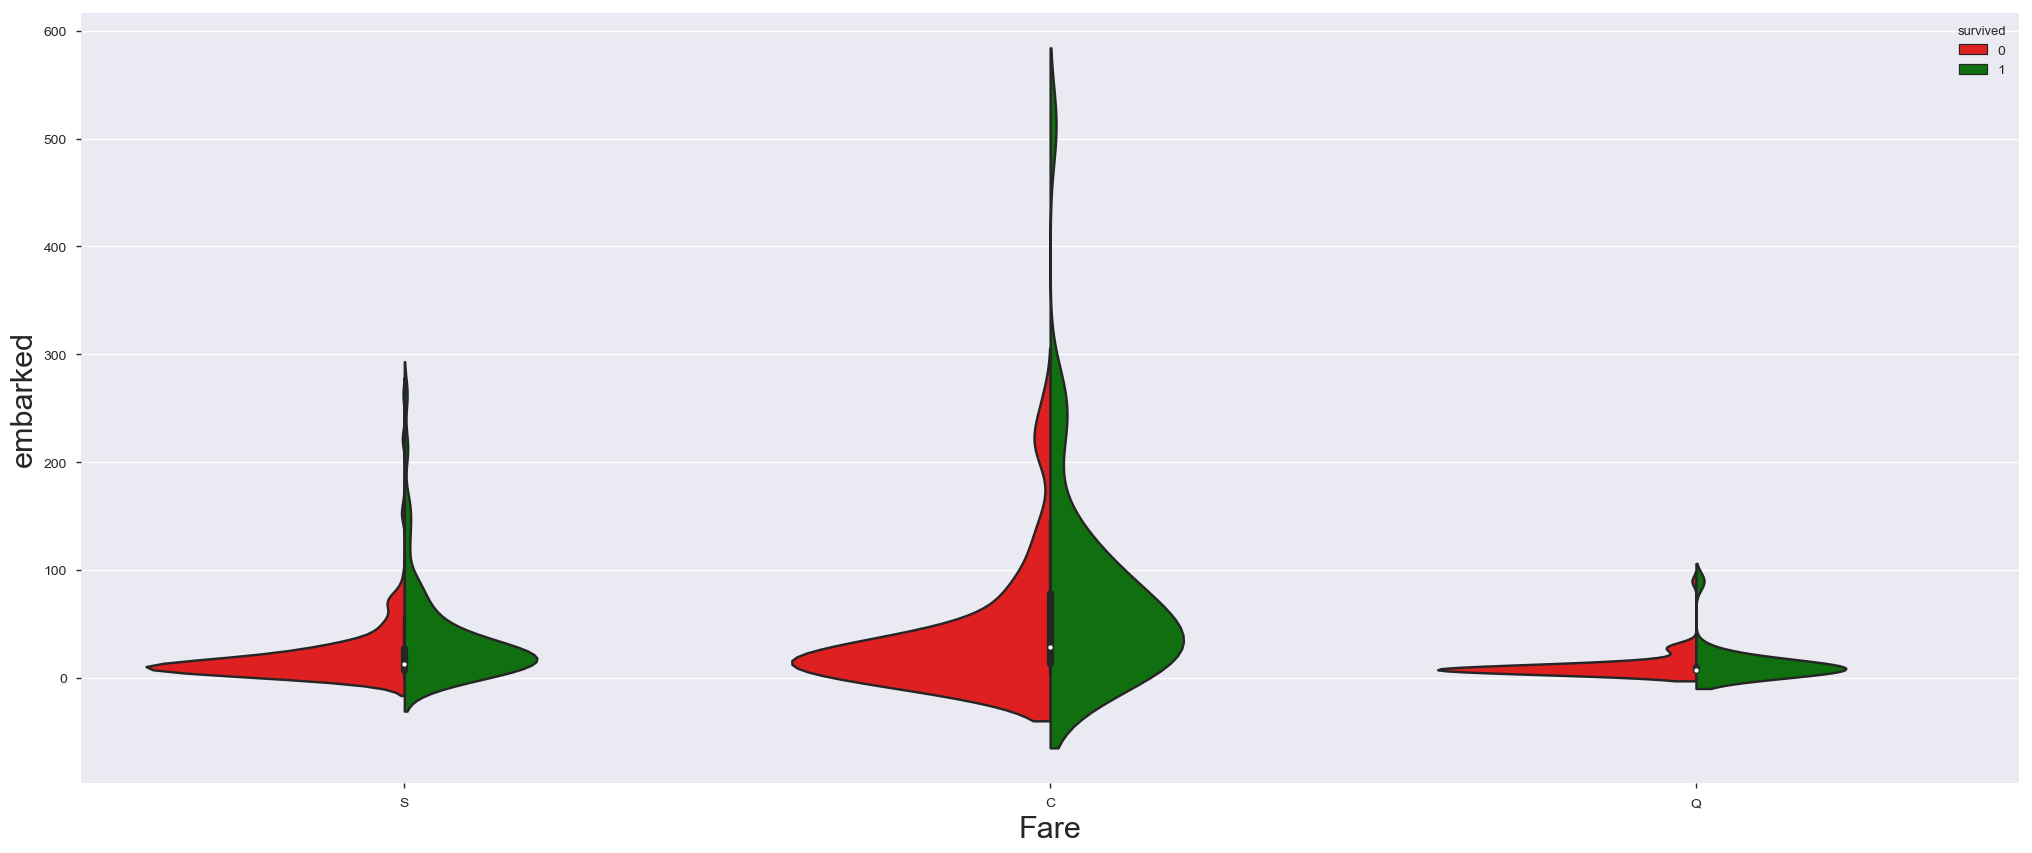

In [20]:
#now see how the embarkation site affects the survival.
fig = plt.figure(figsize=(25, 10))
sns.violinplot(x='embarked', y='fare', hue='survived', data=titanicData, split=True, palette={0: "r", 1: "g"})
plt.xlabel('Fare',{'fontname':'Arial', 'size':'22'})
plt.ylabel('embarked',{'fontname':'Arial', 'size':'22'})
plt.show()

In [21]:
#% of the Survived on overall population
titanicData_survived=titanicData.loc[titanicData.survived==1,]
len(titanicData['survived'])
len(titanicData_survived['survived'])
print(len(titanicData_survived['survived'])/len(titanicData['survived']))

1309

500

0.3819709702062643


# Feature Engginering

In [22]:
featureEngData = titanicData
featureEngData.info()
featureEngData.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


(1309, 14)

In [23]:
#Extracting the passenger titles
titles = set()
for name in featureEngData['name']:
    titles.add(name.split(',')[1].split('.')[0].strip())

print(titles)

{'Mrs', 'Sir', 'Capt', 'Jonkheer', 'Rev', 'Dona', 'Major', 'the Countess', 'Mlle', 'Ms', 'Mme', 'Miss', 'Master', 'Lady', 'Mr', 'Don', 'Dr', 'Col'}


In [24]:
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

def get_titles():
    # we extract the title from each name
    featureEngData['title'] = featureEngData['name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated title we map each title
    featureEngData['title'] = featureEngData.title.map(Title_Dictionary)    
    return featureEngData

In [25]:
featureEngData = get_titles()
featureEngData.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Mrs


In [26]:
# check if the titles have been filled correctly.
featureEngData[featureEngData['title'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title
218,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,8,NaN,NaN,NaN


There is indeed a NaN value in the line 218. In fact the corresponding name is Oliva y Ocana, Dona. Fermina.
This title was not encoutered in the train dataset.

In [27]:
# encoding in dummy variable
titles_dummies = pd.get_dummies(featureEngData['title'], prefix='Title')
featureEngData = pd.concat([featureEngData, titles_dummies], axis=1)
featureEngData.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,...,boat,body,home.dest,title,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,...,2,NaN,"St Louis, MO",Miss,0,1,0,0,0,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,...,11,NaN,"Montreal, PQ / Chesterville, ON",Master,1,0,0,0,0,0
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,...,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss,0,1,0,0,0,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,...,NaN,135.0,"Montreal, PQ / Chesterville, ON",Mr,0,0,1,0,0,0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,...,NaN,NaN,"Montreal, PQ / Chesterville, ON",Mrs,0,0,0,1,0,0


In [28]:
print (featureEngData.iloc[:1309].age.isnull().sum())

263


Processing the ages as we have seen age has 263 / 20.1% missing values Missing. As this is large number of missing data and replacing them with mean, median will not give proper outcome, since the age may differ by groups and categories of passengers. Let's group the age with Sex, PClass and Newly added column Title

In [29]:
#Now lets see by grouping function for both class, title sex:

grouped_train = featureEngData.iloc[:1309].groupby(['pclass','title','sex'])
grouped_median_train = grouped_train.median()
grouped_median_train = grouped_median_train.reset_index()[['sex', 'pclass', 'title', 'age']]

In [30]:
grouped_median_train.head()

,sex,pclass,title,age
0,male,1,Master,6.0
1,female,1,Miss,30.0
2,male,1,Mr,41.5
3,female,1,Mrs,45.0
4,female,1,Officer,49.0


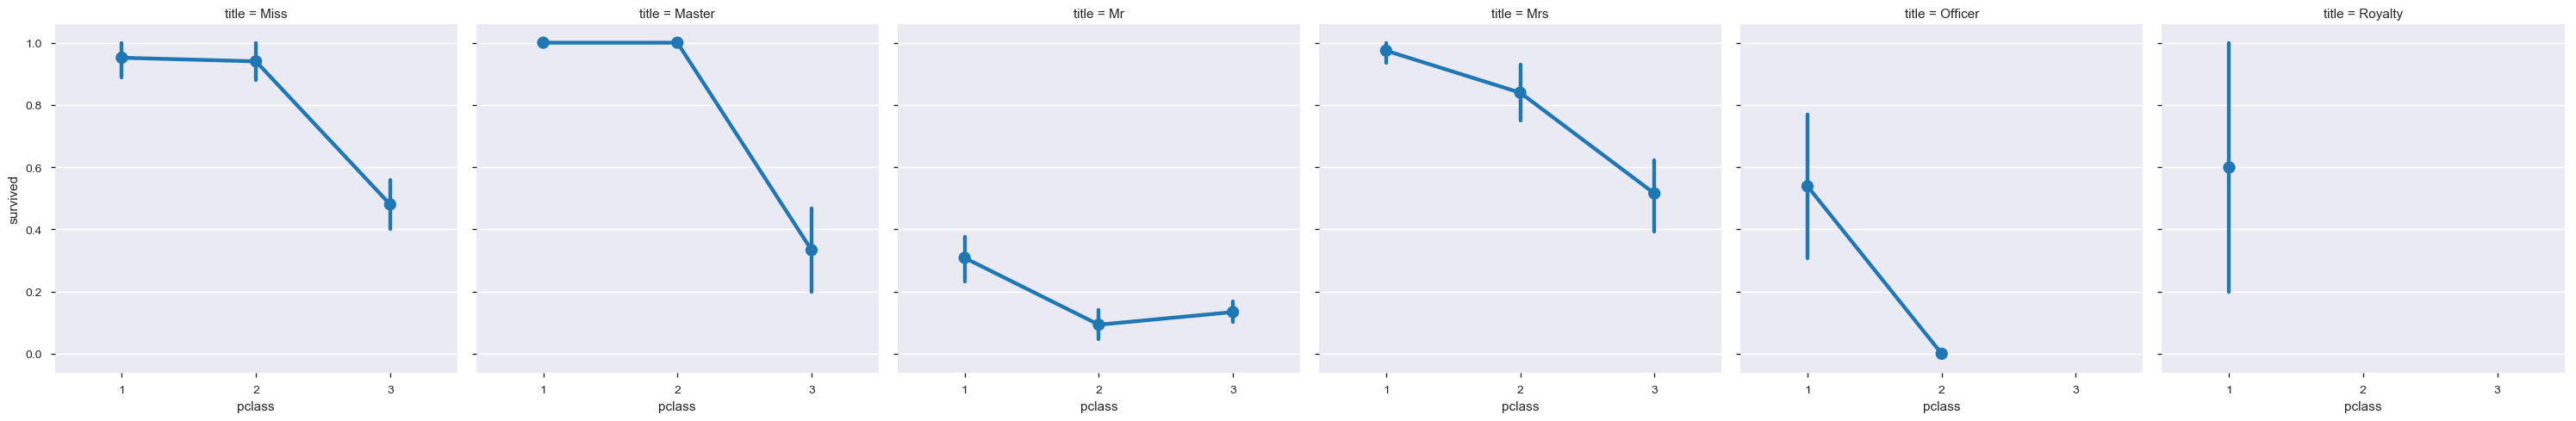

In [31]:
sns.factorplot('pclass','survived',col='title',data=featureEngData)
plt.show()

In [32]:
def fill_age(row):
    condition = (
        (grouped_median_train['sex'] == row['sex']) & 
        (grouped_median_train['title'] == row['title']) & 
        (grouped_median_train['pclass'] == row['pclass'])
    ) 
    return grouped_median_train[condition]['age'].values[0]

def process_age():
    # a function that fills the missing values of the Age variable
    featureEngData['age'] = featureEngData.apply(lambda row: fill_age(row) if np.isnan(row['age']) else row['age'], axis=1)
    return featureEngData

In [33]:
featureEngData = process_age()
featureEngData.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,...,boat,body,home.dest,title,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,...,2,NaN,"St Louis, MO",Miss,0,1,0,0,0,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,...,11,NaN,"Montreal, PQ / Chesterville, ON",Master,1,0,0,0,0,0
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,...,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss,0,1,0,0,0,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,...,NaN,135.0,"Montreal, PQ / Chesterville, ON",Mr,0,0,1,0,0,0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,...,NaN,NaN,"Montreal, PQ / Chesterville, ON",Mrs,0,0,0,1,0,0


In [34]:
print (featureEngData.iloc[:1309].age.isnull().sum())

0


Perfect. The missing ages have been replaced.

In [35]:
#processing for fare
print (featureEngData.iloc[:1309].fare.isnull().sum())

1


In [36]:
# there's one missing fare value - replacing it with the mean.
featureEngData.fare.fillna(featureEngData.iloc[:1309].fare.mean(), inplace=True)
print (featureEngData.iloc[:1309].fare.isnull().sum())

0


In [37]:
#processing for Embarked
print (featureEngData.iloc[:1309].embarked.isnull().sum())

2


In [38]:
print('Counts of Labels')
featureEngData.groupby("embarked").size()

Counts of Labels


embarked
C    270
Q    123
S    914
dtype: int64

In [39]:
# two missing embarked values - filling them with the most frequent one in the featureEngData set(S)
featureEngData1  = featureEngData.embarked.fillna('S', inplace=True)

In [40]:
# dummy encoding for embarked values 
embarked_dummies = pd.get_dummies(featureEngData['embarked'], prefix='Embarked')
featureEngData = pd.concat([featureEngData, embarked_dummies], axis=1)
featureEngData.head()
featureEngData.shape

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,...,title,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,...,Miss,0,1,0,0,0,0,0,0,1
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,...,Master,1,0,0,0,0,0,0,0,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,...,Miss,0,1,0,0,0,0,0,0,1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,...,Mr,0,0,1,0,0,0,0,0,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,...,Mrs,0,0,0,1,0,0,0,0,1


(1309, 24)

In [41]:
#processing for cabin
print (featureEngData.iloc[:1309].cabin.isnull().sum())

1014


In [42]:
# replacing missing cabins with U (for Uknown)
featureEngData.cabin.fillna('U', inplace=True)
print (featureEngData.iloc[:1309].cabin.isnull().sum())

0


In [43]:
#Takenfirst letter of name Cabin ex. C22 
train_cabin = set()

for c in featureEngData.iloc[:1309]['cabin']:
    try:
        train_cabin.add(c[0])
    except:
        train_cabin.add('U')

print (train_cabin)

{'B', 'D', 'C', 'E', 'T', 'G', 'U', 'A', 'F'}


In [44]:
# mapping each Cabin value with the cabin letter
featureEngData['cabin'] = featureEngData['cabin'].map(lambda C: C[0])

# dummy encoding ...
cabin_dummies = pd.get_dummies(featureEngData['cabin'], prefix='Cabin')    

featureEngData = pd.concat([featureEngData, cabin_dummies], axis=1)
featureEngData.head()
featureEngData.shape

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,...,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B,...,1,0,1,0,0,0,0,0,0,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C,...,1,0,0,1,0,0,0,0,0,0
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C,...,1,0,0,1,0,0,0,0,0,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C,...,1,0,0,1,0,0,0,0,0,0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C,...,1,0,0,1,0,0,0,0,0,0


(1309, 33)

In [45]:
#Processing for sex mapping string values to numerical one 
featureEngData['sex'] = featureEngData['sex'].map({'male':1, 'female':0})
featureEngData.head()
featureEngData.shape

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,...,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,B,...,1,0,1,0,0,0,0,0,0,0
1,1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,C,...,1,0,0,1,0,0,0,0,0,0
2,1,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.5500,C,...,1,0,0,1,0,0,0,0,0,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,C,...,1,0,0,1,0,0,0,0,0,0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,113781,151.5500,C,...,1,0,0,1,0,0,0,0,0,0


(1309, 33)

In [46]:
#processing for pclass
print (featureEngData.iloc[:1309].pclass.isnull().sum())

0


In [47]:
# encoding into 3 categories:
pclass_dummies = pd.get_dummies(featureEngData['pclass'], prefix="Pclass")
# adding dummy variable
featureEngData = pd.concat([featureEngData, pclass_dummies],axis=1)
featureEngData.head()
featureEngData.shape

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,B,...,0,0,0,0,0,0,0,1,0,0
1,1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,C,...,1,0,0,0,0,0,0,1,0,0
2,1,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.5500,C,...,1,0,0,0,0,0,0,1,0,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,C,...,1,0,0,0,0,0,0,1,0,0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,113781,151.5500,C,...,1,0,0,0,0,0,0,1,0,0


(1309, 36)

In [48]:
#processing for pclass
print (featureEngData.iloc[:1309].ticket.isnull().sum())

0


In [49]:
NoneType = type(None)
IntType = type(int)
def cleanTicket(ticket):
    if type(ticket) == NoneType:
        return 'XXX'
    elif type(ticket) == int:
        return 'XXX'
    else:
        ticket = ticket.replace('.', '')
        ticket = ticket.replace('/', '')
        ticket = ticket.split()
        ticket = map(lambda t : t.strip(), ticket)
        ticket = list(filter(lambda t : not t.isdigit(), ticket))
        if len(ticket) > 0:
            return ticket[0]
        else: 
            return 'XXX'

In [50]:
# a function that extracts each prefix of the ticket, returns 'XXX' if no prefix (i.e the ticket is a digit)
tickets = set()
for t in featureEngData['ticket']:
    tickets.add(cleanTicket(t))

In [51]:
# Extracting dummy variables from tickets:

featureEngData['ticket'] = featureEngData['ticket'].map(cleanTicket)
tickets_dummies = pd.get_dummies(featureEngData['ticket'], prefix='Ticket')
featureEngData = pd.concat([featureEngData, tickets_dummies], axis=1)
featureEngData.head()
featureEngData.shape

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,...,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,XXX,211.3375,B,...,0,0,0,0,0,0,0,0,0,1
1,1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,XXX,151.5500,C,...,0,0,0,0,0,0,0,0,0,1
2,1,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,XXX,151.5500,C,...,0,0,0,0,0,0,0,0,0,1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,XXX,151.5500,C,...,0,0,0,0,0,0,0,0,0,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,XXX,151.5500,C,...,0,0,0,0,0,0,0,0,0,1


(1309, 73)

In [52]:
print('Counts of Labels')
featureEngData.groupby("ticket").size()

Counts of Labels


ticket
A            1
A4          10
A5          28
AQ3          1
AQ4          1
AS           1
C            8
CA          68
CASOTON      1
FC           3
FCC          9
Fa           1
LINE         4
LP           1
PC          92
PP           4
PPP          2
SC           2
SCA3         1
SCA4         2
SCAH         5
SCOW         1
SCPARIS     14
SCParis      5
SOC          8
SOP          1
SOPP         7
SOTONO2      3
SOTONOQ     24
SP           1
STONO       14
STONO2       7
STONOQ       1
SWPP         2
WC          15
WEP          4
XXX        957
dtype: int64

Below we are introduces 4 new features:

FamilySize : the total number of relatives including the passenger (him/her)self.
Sigleton : a boolean variable that describes families of size = 1
SmallFamily : a boolean variable that describes families of 2 <= size <= 4
LargeFamily : a boolean variable that describes families of 5 < size

In [53]:
# introducing a new feature : the size of families (including the passenger)
featureEngData['FamilySize'] = featureEngData['parch'] + featureEngData['sibsp'] + 1

# introducing other features based on the family size
featureEngData['Singleton'] = featureEngData['FamilySize'].map(lambda s: 1 if s == 1 else 0)
featureEngData['SmallFamily'] = featureEngData['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
featureEngData['LargeFamily'] = featureEngData['FamilySize'].map(lambda s: 1 if 5 <= s else 0)
featureEngData.head()
featureEngData.shape

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,...,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,XXX,211.3375,B,...,0,0,0,0,0,1,1,1,0,0
1,1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,XXX,151.5500,C,...,0,0,0,0,0,1,4,0,1,0
2,1,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,XXX,151.5500,C,...,0,0,0,0,0,1,4,0,1,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,XXX,151.5500,C,...,0,0,0,0,0,1,4,0,1,0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,XXX,151.5500,C,...,0,0,0,0,0,1,4,0,1,0


(1309, 77)

In [54]:
# removing the all duplicate  variables like (title,embarked)
featureEngData.drop('name', axis=1, inplace=True)
featureEngData.drop('embarked', axis=1, inplace=True)
featureEngData.drop('cabin', axis=1, inplace=True)
featureEngData.drop('pclass',axis=1,inplace=True)
featureEngData.drop('ticket', inplace=True, axis=1)
featureEngData.drop('title', axis=1, inplace=True)
featureEngData.drop('boat', axis=1, inplace=True)
featureEngData.drop('body', axis=1, inplace=True)
featureEngData.drop('home.dest', axis=1, inplace=True)
featureEngData.drop('survived', axis=1, inplace=True)

In [55]:
featureEngData.head()
featureEngData.columns
featureEngData.shape

,sex,age,sibsp,parch,fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,...,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Singleton,SmallFamily,LargeFamily
0,0,29.0000,0,0,211.3375,0,1,0,0,0,...,0,0,0,0,0,1,1,1,0,0
1,1,0.9167,1,2,151.5500,1,0,0,0,0,...,0,0,0,0,0,1,4,0,1,0
2,0,2.0000,1,2,151.5500,0,1,0,0,0,...,0,0,0,0,0,1,4,0,1,0
3,1,30.0000,1,2,151.5500,0,0,1,0,0,...,0,0,0,0,0,1,4,0,1,0
4,0,25.0000,1,2,151.5500,0,0,0,1,0,...,0,0,0,0,0,1,4,0,1,0


Index(['sex', 'age', 'sibsp', 'parch', 'fare', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Title_Royalty', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D',
       'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T', 'Cabin_U', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Ticket_A', 'Ticket_A4', 'Ticket_A5',
       'Ticket_AQ3', 'Ticket_AQ4', 'Ticket_AS', 'Ticket_C', 'Ticket_CA',
       'Ticket_CASOTON', 'Ticket_FC', 'Ticket_FCC', 'Ticket_Fa', 'Ticket_LINE',
       'Ticket_LP', 'Ticket_PC', 'Ticket_PP', 'Ticket_PPP', 'Ticket_SC',
       'Ticket_SCA3', 'Ticket_SCA4', 'Ticket_SCAH', 'Ticket_SCOW',
       'Ticket_SCPARIS', 'Ticket_SCParis', 'Ticket_SOC', 'Ticket_SOP',
       'Ticket_SOPP', 'Ticket_SOTONO2', 'Ticket_SOTONOQ', 'Ticket_SP',
       'Ticket_STONO', 'Ticket_STONO2', 'Ticket_STONOQ', 'Ticket_SWPP',
       'Ticket_WC', 'Ticket_WEP', 'Ticket_XXX', 'FamilySize', 'Singleton',
       'SmallFamily', 'LargeFamily'],
 

(1309, 67)

In [56]:
X = featureEngData
y = titanicData['survived'].values

# Now start building the models using this converted data

In [57]:
#Lets try a decision tree

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=1)
X_train.shape
X_test.shape
y_train.shape
y_test.shape
type(X_train)

(1047, 67)

(262, 67)

(1047,)

(262,)

pandas.core.frame.DataFrame

In [59]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(criterion="gini",max_depth=10)
clf_dt.fit (X_train, y_train)
classes = clf_dt.predict(X_test)
clf_dt.score (X_test, y_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

0.7862595419847328

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

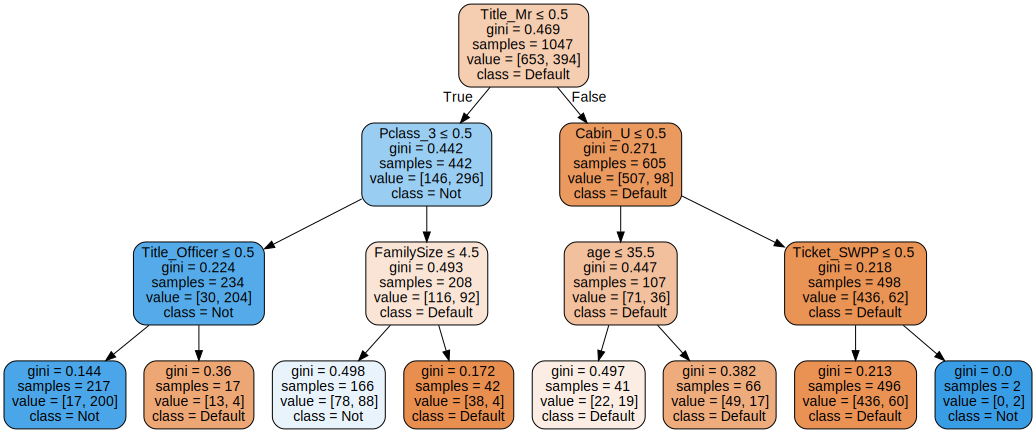

In [60]:
import graphviz
from sklearn import tree
clf_dt1 = DecisionTreeClassifier(criterion="gini",max_depth=3)
clf_dt1.fit (X_train, y_train)
dot_data = tree.export_graphviz(clf_dt1, out_file=None,
                               feature_names=X_train.columns,
                               class_names=['Default','Not'],
                               filled=True, rounded=True,
                               special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [61]:
#Precision and Recall
print('Accuracy Score')
print(metrics.accuracy_score(y_test,classes))
print('Precision/Recall Metrices')
print(metrics.classification_report(y_test,classes))
print('AUC')
print(metrics.roc_auc_score(y_test,classes))

Accuracy Score
0.7862595419847328
Precision/Recall Metrices
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       156
           1       0.75      0.72      0.73       106

   micro avg       0.79      0.79      0.79       262
   macro avg       0.78      0.78      0.78       262
weighted avg       0.79      0.79      0.79       262

AUC
0.7751572327044025


Text(0.5, 1.0, 'ROCR CHART')

(0, 1)

(0, 1)

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

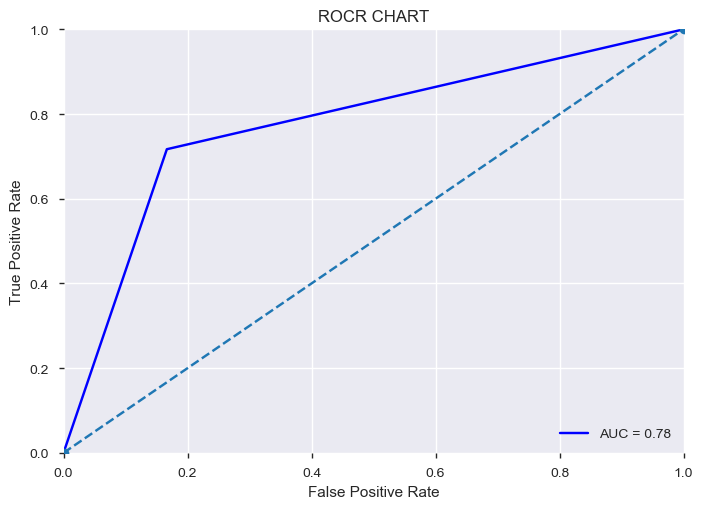

In [62]:
#ROC Chart
fpr, tpr, th = roc_curve(y_test,classes)
roc_auc = metrics.auc(fpr,tpr)
import matplotlib.pyplot as plt
plt.title('ROCR CHART')
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion Matrix


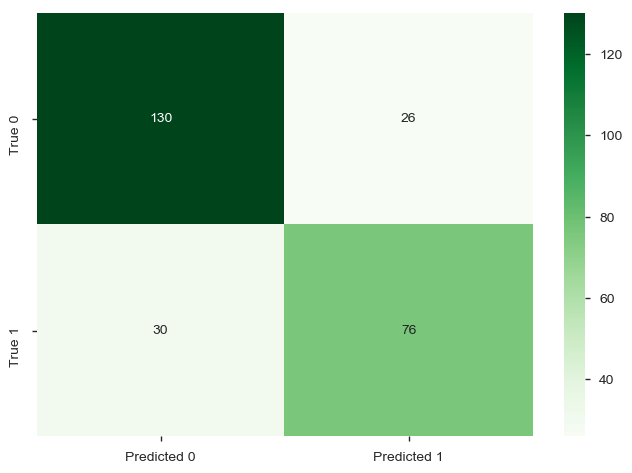

In [63]:
#Confusion Matrix
print("Confusion Matrix")
cf = metrics.confusion_matrix(y_test,classes)
lbl1 = ["Predicted 0","Predicted 1"]
lbl2 = ["True 0", "True 1"]
sns.heatmap(cf, annot=True, cmap="Greens", fmt="d", xticklabels=lbl1, yticklabels=lbl2)
plt.show()

In [64]:
feature_imp=pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(clf_dt.feature_importances_)],axis=1)

In [65]:
feature_imp.columns=['Feature','Relative_Importance']

In [66]:
feature_imp=feature_imp.sort_values('Relative_Importance',ascending=False)

In [67]:
feature_imp

,Feature,Relative_Importance
7,Title_Mr,0.370622
4,fare,0.145476
25,Pclass_3,0.121611
1,age,0.120064
63,FamilySize,0.052845
9,Title_Officer,0.041811
22,Cabin_U,0.029844
2,sibsp,0.018291
18,Cabin_E,0.010019
59,Ticket_SWPP,0.008665


In [68]:
tree_test_pred = pd.DataFrame( { 'actual':  y_test,
                            'predicted': clf_dt.predict( X_test ) } )

In [69]:
tree_test_pred.sample( n = 50 )

,actual,predicted
167,0,0
235,0,1
162,0,0
227,0,1
153,0,0
150,0,0
64,1,1
214,1,0
213,0,0
121,0,1


In [70]:
metrics.accuracy_score( tree_test_pred.actual, tree_test_pred.predicted )

0.7862595419847328

# Logistic Regression

In [71]:
from sklearn.linear_model import  LogisticRegression

lin_model = LogisticRegression()
lin_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [72]:
print('Coefficients: \n',lin_model.coef_)

Coefficients: 
 [[-1.07635714 -0.02923796 -0.36287666 -0.18139758  0.00241318  1.20066323
   0.38919303 -1.0520827   0.93020022 -0.78597604 -0.16459186  0.53183375
   0.11641469  0.03644472  0.45213407  0.26470675 -0.16795436  0.28017082
   0.81484566  0.45492057 -0.65531979 -0.25019644 -0.50861412  0.92818718
   0.31773015 -0.56122417  0.34733118 -0.38644332 -0.30159913 -0.47349522
   0.         -0.07115025  0.07910294  0.12729408 -0.14077329  0.22427147
  -0.24581731  0.         -0.16143796 -0.07107882 -0.25223422  0.55836521
  -0.03643891 -0.14077329 -0.1958045  -0.14167194 -0.36683408  0.
   0.52735129  0.02501333 -0.3485905   0.         -0.03674953  0.60006375
  -0.29362553 -0.08491817  1.25510901 -0.05012175  0.          1.30927712
  -0.52744074 -0.17273934  0.13125155  0.14041893  0.59895193  0.60918595
  -0.52344472]]


In [73]:
#Find out key predictor of churn
coeff= pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(lin_model.coef_))], axis=1)
coeff.columns=("Variable","Coeff")
coeff.sort_values("Variable",ascending=True)

,Variable,Coeff
14,Cabin_A,0.452134
15,Cabin_B,0.264707
16,Cabin_C,-0.167954
17,Cabin_D,0.280171
18,Cabin_E,0.814846
19,Cabin_F,0.454921
20,Cabin_G,-0.655320
21,Cabin_T,-0.250196
22,Cabin_U,-0.508614
11,Embarked_C,0.531834


In [74]:
#Generate Model Diagnostics
predictions = lin_model.predict(X_test)
print(predictions.size)

print("Positive cases in Test Data",y_test[y_test==1].shape[0])
print("Negative cases in Test Data",y_test[y_test==0].shape[0])

262
Positive cases in Test Data 106
Negative cases in Test Data 156


In [75]:
#Precision and Recall
print('Accuracy Score')
print(metrics.accuracy_score(y_test,predictions))
print('Precision/Recall Metrices')
print(metrics.classification_report(y_test,predictions))
print('AUC')
print(metrics.roc_auc_score(y_test,predictions))

Accuracy Score
0.851145038167939
Precision/Recall Metrices
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       156
           1       0.88      0.74      0.80       106

   micro avg       0.85      0.85      0.85       262
   macro avg       0.86      0.83      0.84       262
weighted avg       0.85      0.85      0.85       262

AUC
0.8326681180454766


Text(0.5, 1.0, 'ROCR CHART')

(0, 1)

(0, 1)

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

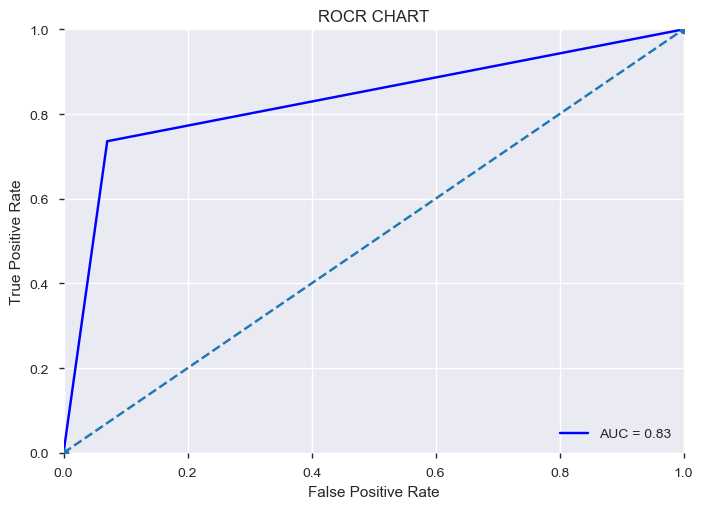

In [76]:
#ROC Chart
fpr, tpr, th = roc_curve(y_test,predictions)
roc_auc = metrics.auc(fpr,tpr)
import matplotlib.pyplot as plt
plt.title('ROCR CHART')
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion Matrix


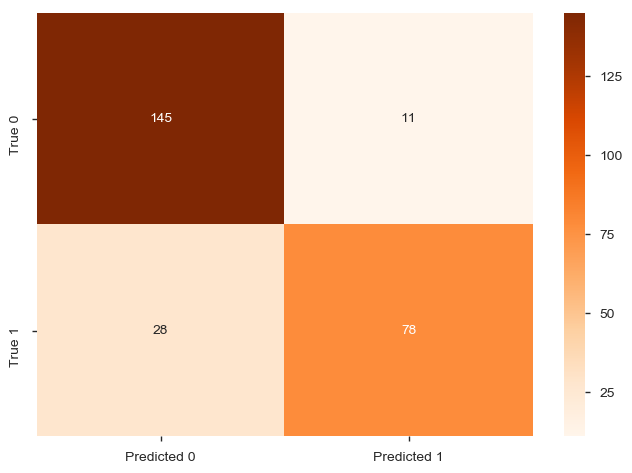

In [77]:
#Confusion Matrix
print("Confusion Matrix")
cf = metrics.confusion_matrix(y_test,predictions)
lbl1 = ["Predicted 0","Predicted 1"]
lbl2 = ["True 0", "True 1"]
sns.heatmap(cf, annot=True, cmap="Oranges", fmt="d", xticklabels=lbl1, yticklabels=lbl2)
plt.show()

In [78]:
Image(url= "titanic_survived.jpg")